**ASSIGNMENT: SALES PREDICTION USING PYTHON**

**NAME : CHAMAN YADAV**

**Objective:-**
*Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential.*


*IMPORTING IMPORTANT LIBRARIES*

In [36]:
import numpy as np  # Importing numpy for numerical operations
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for data visualization

*Lets get our data here*

In [37]:
file = pd.read_csv("sales.csv")
file.head(6)   #It will give 6 starting data values of the CSV file

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2


*Lets see the size of our data*

In [38]:
file.shape # to get the dimension of our data

(200, 4)

***df.describe()** provides descriptive statistics for each numerical column in the DataFrame df, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.*

In [39]:
file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Observations from the above data**
- TV ads cost the most on average, showing they're very important for marketing.
- Radio ads cost the least on average, meaning they're not as popular for spending money on.
- Average Sales: $15,130.50
- Sales vary a lot, from as low as \\$1.60 to as high as \\$27.

***Lets look at the Relationship Between Advertising Expenses and Sales for TV, Radio and Newspaper to understand them by comparision.***

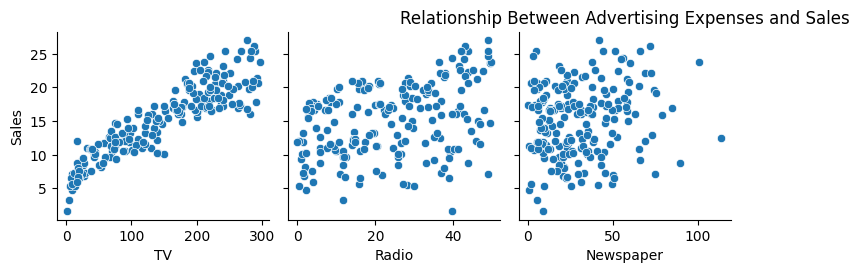

In [40]:
sns.pairplot(file, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.title('Relationship Between Advertising Expenses and Sales')
plt.show()


### **Observation from above plot**

- When advertising costs increase in TV ads, sales are also expected to increase. 
- However, the relationship with sales is somewhat unpredictable for newspaper and radio advertisements.

### Lets plot some Histograms to see how and when sales changes

Text(0, 0.5, 'Sales')

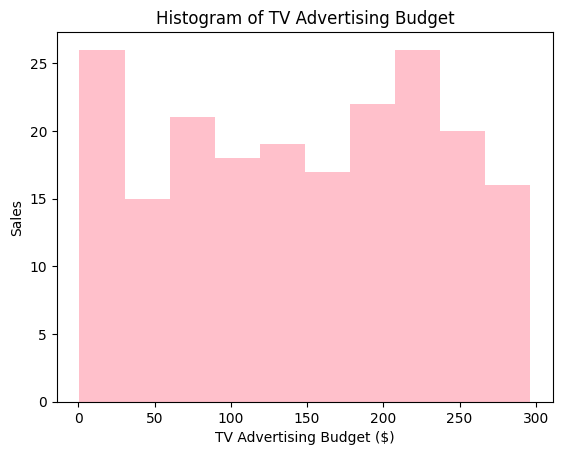

In [41]:
# Plotting the histogram for the 'TV' column
file['TV'].plot.hist(bins=10, color="pink")

# Adding labels and title
plt.title('Histogram of TV Advertising Budget')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

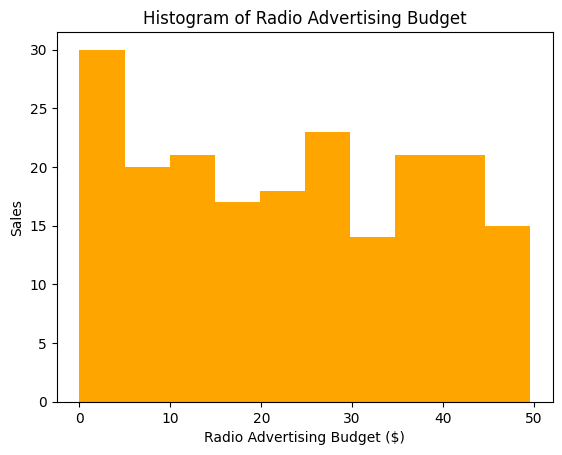

In [42]:
# Plotting the histogram for the 'Radio' column
file['Radio'].plot.hist(bins=10, color="orange")

# Adding labels and title
plt.title('Histogram of Radio Advertising Budget')
plt.xlabel('Radio Advertising Budget ($)')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

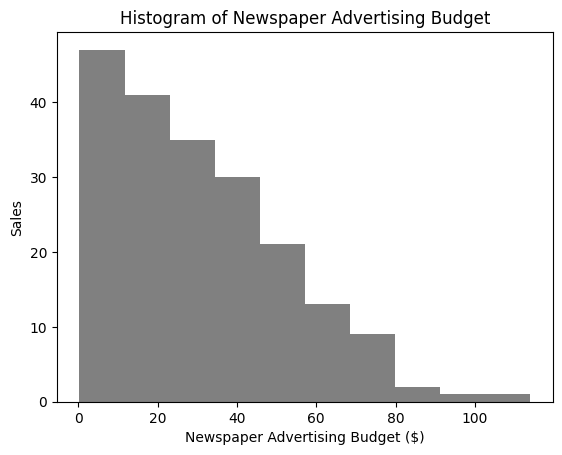

In [43]:
# Plotting the histogram for the 'Newspaper' column
file['Newspaper'].plot.hist(bins=10, color="grey")

# Adding labels and title
plt.title('Histogram of Newspaper Advertising Budget')
plt.xlabel('Newspaper Advertising Budget ($)')
plt.ylabel('Sales')

### **Observations from the Histogram Plots**
- There seems to be a positive correlation between advertising spending and sales. As spending on TV and radio advertisements increases, there is a visible trend of higher sales figures.
- However, the relationship between newspaper advertisement spending and sales appears less straightforward. While there are instances of high sales figures with moderate newspaper spending, there are also cases where high spending does not necessarily translate to high sales.
- Overall, TV advertisement spending appears to have the strongest impact on sales, followed by radio, while the effect of newspaper advertising is less clear.
- The majority sales is the result of low advertising cost in newspaper



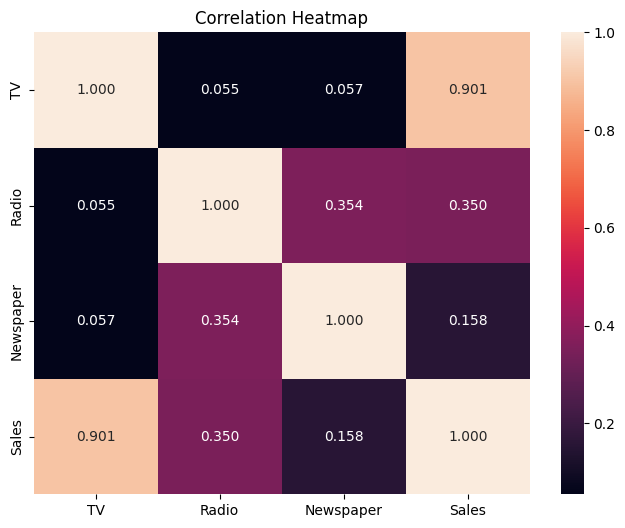

In [44]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(file.corr(), annot=True, fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

### **Observations from above Correlation Heatmap**
- There is a strong positive correlation between TV advertisement spending and sales, with a correlation coefficient of 0.901. This suggests that as spending on TV advertisements increases, sales tend to increase proportionally.
- There is a moderate positive correlation between radio advertisement spending and sales, with a correlation coefficient of 0.350. This indicates that there is a positive relationship between radio advertising expenditure and sales figures, though not as strong as TV advertising.
- The correlation between newspaper advertisement spending and sales is weaker compared to TV and radio, suggesting a less strong positive relationship between newspaper advertising expenditure and sales.
- **So we can get sales is Highly correlated with the TV**

## **Since Sales is Highly correlated with only one variable that is TV. So, lets train our Model Using LINEAR REGRESSION**

In [45]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
X = file[['TV']]  # Features (independent variables)
y = file[['Sales']]  # Target variable (dependent variable)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [46]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [47]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [48]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [49]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


In [50]:
from sklearn.linear_model import LinearRegression
# Assuming X_train and y_train are your training features and target variables
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Generating predictions on the test data using the trained model
res = model.predict(X_test)

# Printing the predictions
print(res)


[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [52]:
model.coef_ # Accessing the coefficients of the linear regression model.

array([[0.05473199]])

In [53]:
model.intercept_ # Accessing the intercept of the linear regression model

array([7.14382225])

In [54]:
0.05473199* 69.2 + 7.14382225

10.931275958

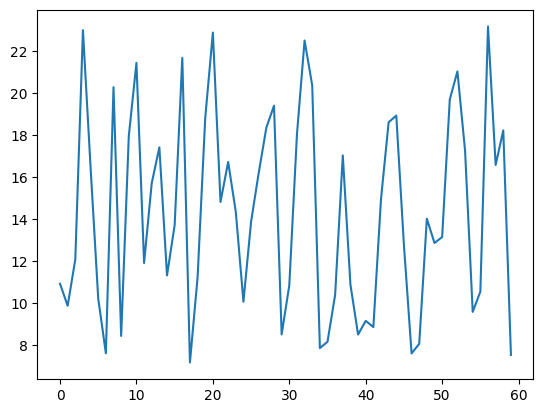

In [55]:
# Assuming 'res' contains the data you want to plot

# Plotting the data
plt.plot(res)

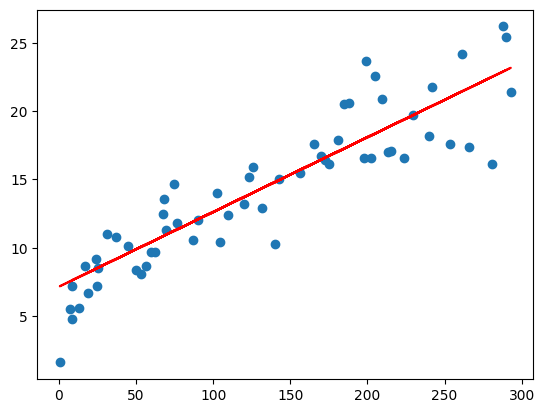

In [33]:
# Scatter plot of the test data points
plt.scatter(X_test, y_test)

# Plotting the linear regression model prediction
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')  

# Display the plot
plt.show()

### **In conclusion, the provided solution effectively predicts sales using datasets from advertising platforms. By leveraging techniques such as train-test splitting and linear regression modeling, we were able to analyze the relationship between advertising spending on TV and resulting sales.**

***This approach yielded valuable insights into the effectiveness of TV advertising in driving sales. Through careful examination and tabular representation of the training and testing datasets, we gained a comprehensive understanding of the data distribution and model performance. Overall, this solution serves as a robust framework for analyzing and predicting sales based on advertising expenditures, offering actionable insights for marketing strategies.***